In [1]:
import pandas as pd
import numpy as  pd

In [2]:
import joblib

# Load the normalized ConvNeXt embeddings
train_df_convnext = joblib.load(r"C:\Users\matan\Downloads\Python Codes\src\Ursa Space\Data\normalized_convnext_embeddings.pkl")
train_df_vit = joblib.load(r"C:\Users\matan\Downloads\Python Codes\src\Ursa Space\Data\normalized_vit_embeddings.pkl")


In [ ]:
# ============================================================
# VConvNext Embeddings check
# ============================================================

X = train_df_convnext.drop(columns = ['label'])
y = train_df_convnext['label']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
#train_df = pd.DataFrame(x_scaled, columns = X.columns)

In [5]:
# Import GB Packages
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [6]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1283, 768)
X_test shape:  (321, 768)


In [7]:
import xgboost as xgb
from xgboost import XGBClassifier

In [18]:
from sklearn.decomposition import PCA


xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    random_state=42,
)

xgb_model.fit(
    X_train, y_train,
)

# ============================================================
# EVALUATE
# ============================================================
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8629
Precision: 0.8808
Recall: 0.8365


In [19]:
path = r"C:\Users\matan\Downloads\Python Codes\src\Ursa Space\Results\xgb_model_results.pkl"

results = joblib.load(path)

# Access components
xgb_model = results["model"]
y_pred = results["y_pred"]
acc = results["accuracy"]
rec = results["recall"]
print(f"Loaded accuracy: {acc:.4f}")
print(f"Loaded recall: {rec:.4f}")

Loaded accuracy: 0.8629
Loaded recall: 0.8365


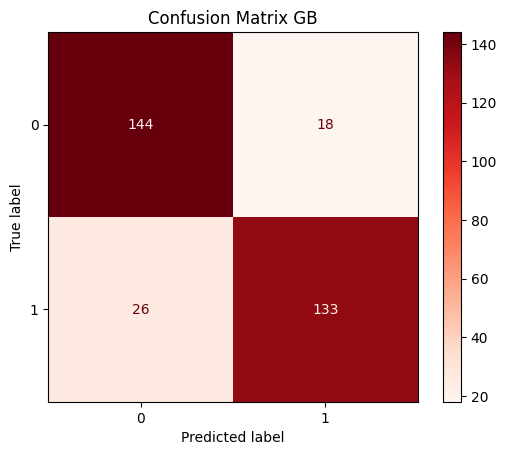

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix GB")
plt.show()

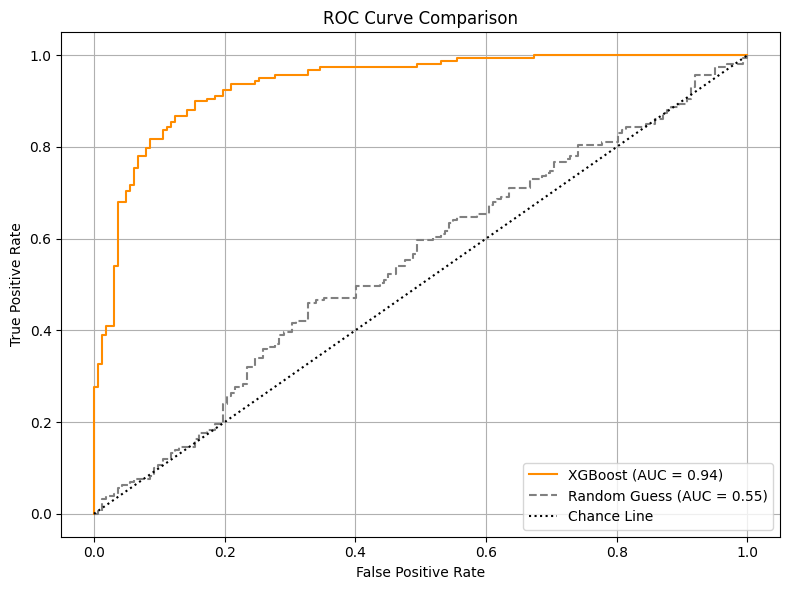

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for your model
fpr_model, tpr_model, _ = roc_curve(y_test, y_proba)
roc_auc_model = auc(fpr_model, tpr_model)

# Generate random guess probabilities
y_random = np.random.uniform(0, 1, size=len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_random)
roc_auc_rand = auc(fpr_rand, tpr_rand)

# Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_model, tpr_model, label=f"XGBoost (AUC = {roc_auc_model:.2f})", color='darkorange')
plt.plot(fpr_rand, tpr_rand, label=f"Random Guess (AUC = {roc_auc_rand:.2f})", color='gray', linestyle='--')
plt.plot([0, 1], [0, 1], color='black', linestyle=':', label="Chance Line")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import joblib

# Package results into a dictionary
results = {
    "model": xgb_model,
    "y_pred": y_pred,
    "y_proba": y_proba,
    "accuracy": acc,
    "precision": precision,
    "recall": recall,
    "confusion_matrix": cm,
    "roc_curve": {
        "fpr": fpr_model,
        "tpr": tpr_model,
        "auc": roc_auc_model
    }
}

# Save to current directory
joblib.dump(results, "xgb_model_results.pkl")
print("Model results saved to xgb_model_results.pkl")

Model results saved to xgb_model_results.pkl


In [ ]:
# ============================================================
# Vit Embeddings check
# ============================================================

X_vit = train_df_vit.drop(columns=['label'])
y_vit = train_df_vit['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_vit, y_vit, test_size=.2, random_state=123)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1283, 768)
X_test shape:  (321, 768)


In [23]:
from sklearn.decomposition import PCA


xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    random_state=42,
)

xgb_model.fit(
    X_train, y_train,
)

# ============================================================
# EVALUATE
# ============================================================
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8255
Precision: 0.8280
Recall: 0.8176


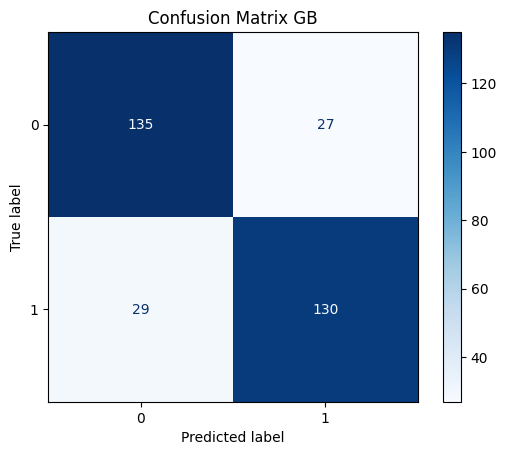

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix GB")
plt.show()

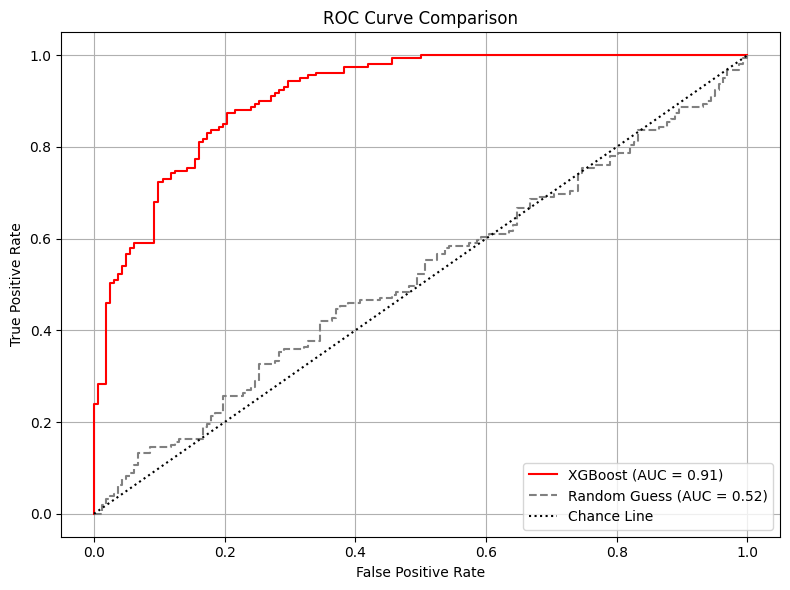

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for your model
fpr_model, tpr_model, _ = roc_curve(y_test, y_proba)
roc_auc_model = auc(fpr_model, tpr_model)

# Generate random guess probabilities
y_random = np.random.uniform(0, 1, size=len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_random)
roc_auc_rand = auc(fpr_rand, tpr_rand)

# Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_model, tpr_model, label=f"XGBoost (AUC = {roc_auc_model:.2f})", color='red')
plt.plot(fpr_rand, tpr_rand, label=f"Random Guess (AUC = {roc_auc_rand:.2f})", color='gray', linestyle='--')
plt.plot([0, 1], [0, 1], color='black', linestyle=':', label="Chance Line")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()